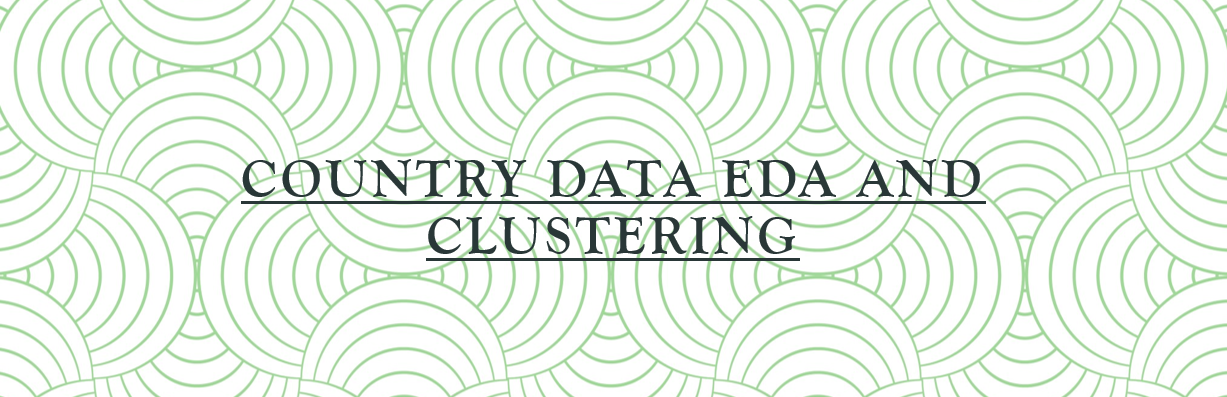

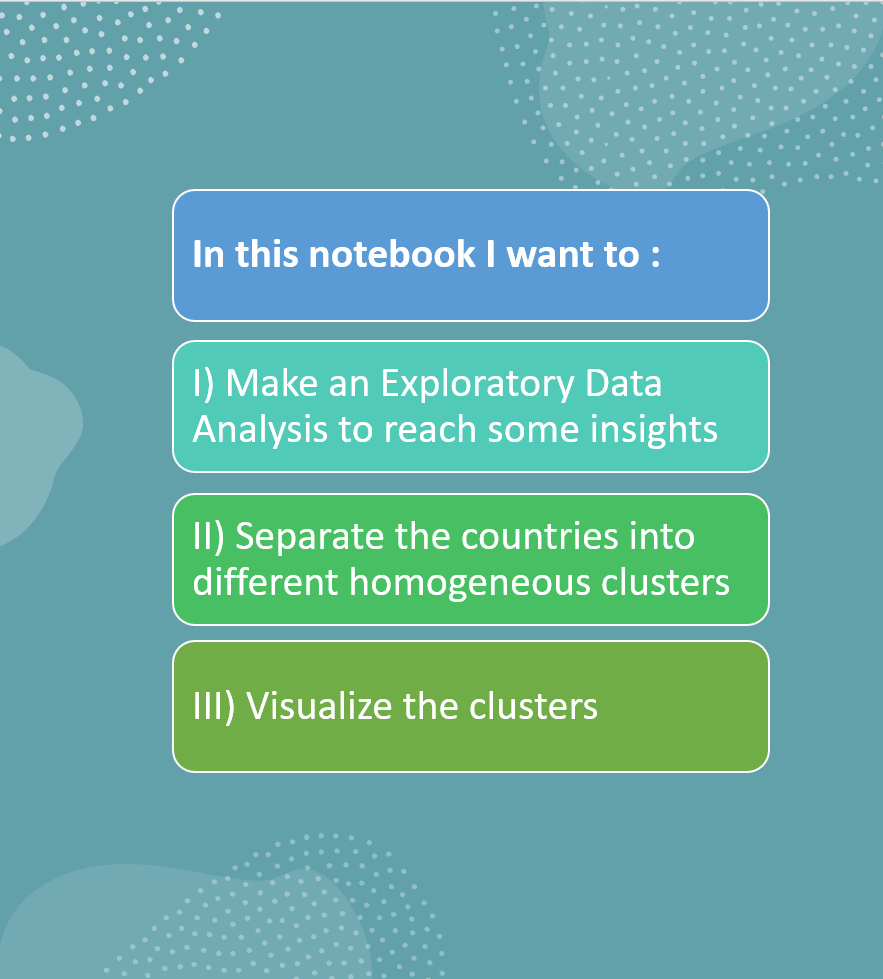

## Data preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Country.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")
print(f"There are {df.isna().sum().sum()} missing values which represents {round((df.isna().sum().sum() / (df.shape[0] * df.shape[1])) * 100, 2)}% of the data.")

There are 167 rows and 10 columns.
There are 0 missing values which represents 0.0% of the data.


# I) Exploratory Data Analysis

In [4]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


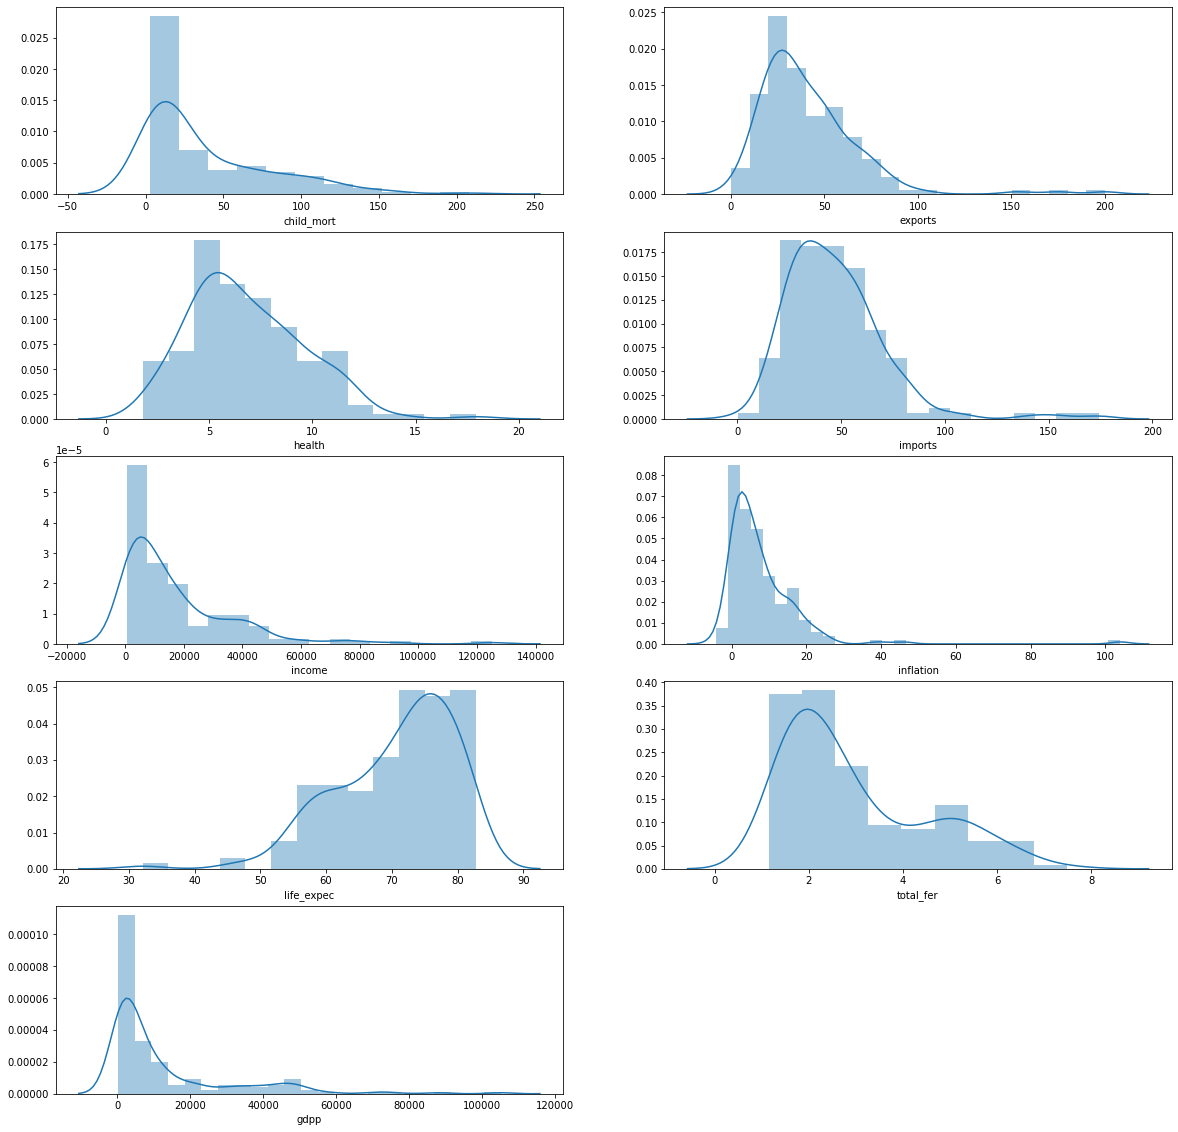

In [5]:
num_cols= [col for col in df.columns]
num_cols.remove('country')

plt.figure(figsize=(20,20))
i=1
for col in num_cols:
    plt.subplot(5,2,i)
    sns.distplot(df[col])
    i+=1

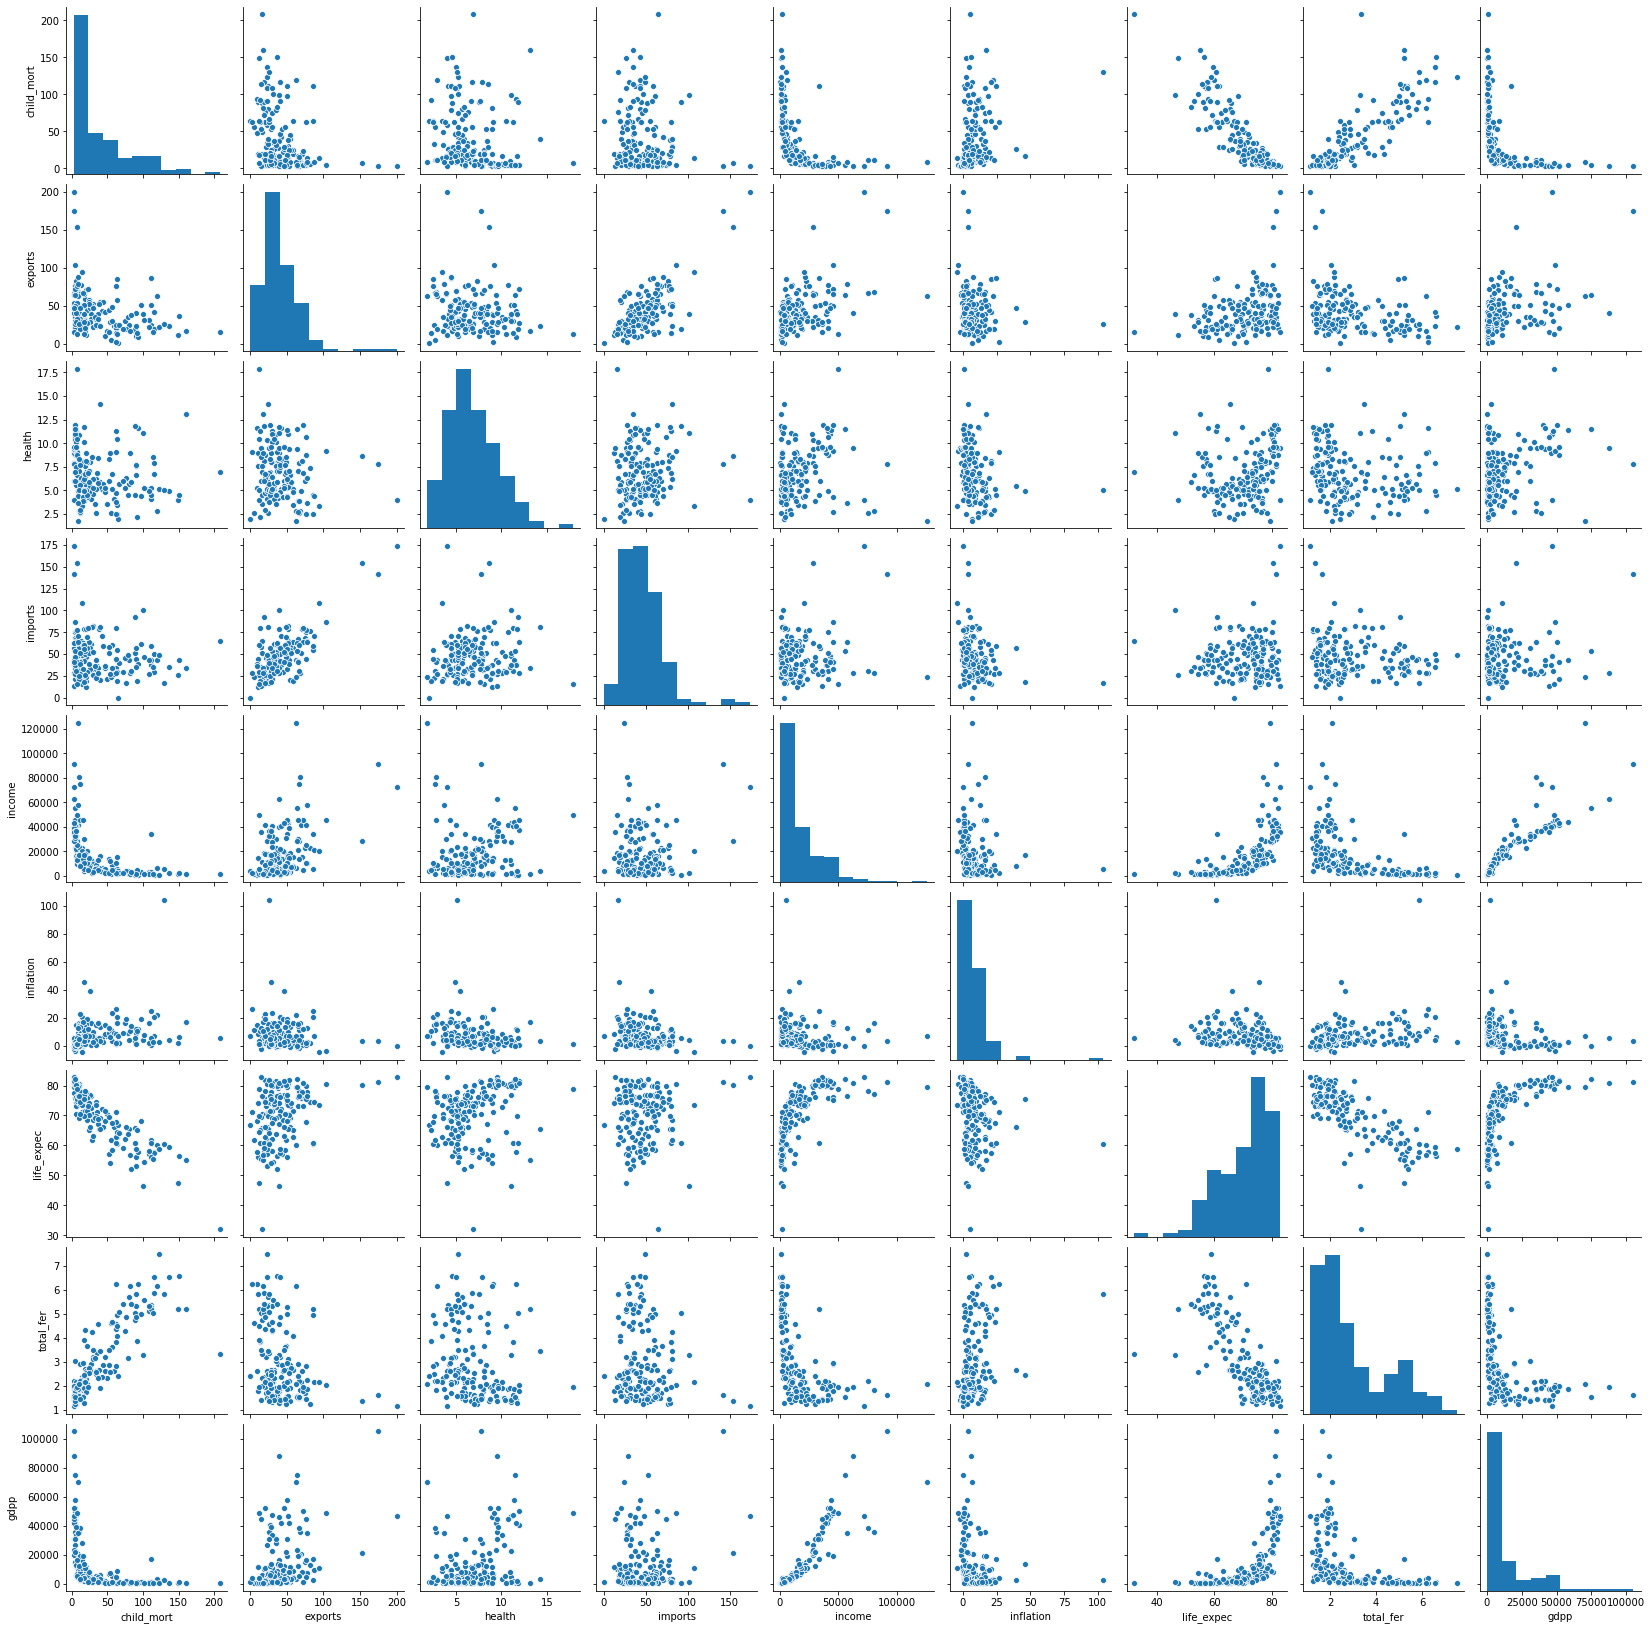

In [6]:
sns.pairplot(df)

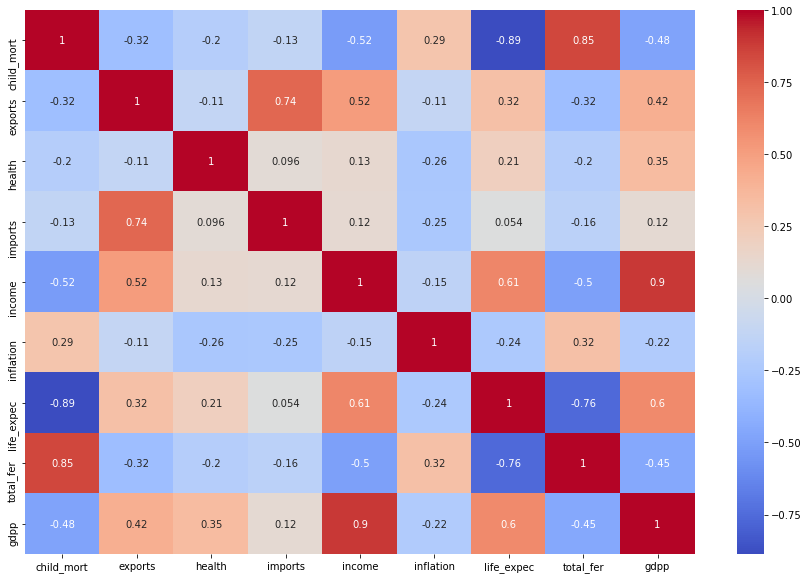

In [7]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

## Insights : 

- Several variables are presenting an irregular distribution
- As expected there are high correlations between many variables like gdpp & income, or child_mortality & life_expectancy.

### The conditions are gathered to make a cluster analysis

In [8]:
df2 = df.drop('country',axis=1)
df2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [9]:
columns = df2.columns

# II) Cluster Analysis

### First, we want all the data to be rescaled to perform better during the clustering

In [10]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X = ss.fit_transform(df2)

In [11]:
X = pd.DataFrame(X,columns=columns)

In [12]:
X.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


### Then, we import KMeans and run the Elbow method to select the right number of clusters

In [13]:
from sklearn.cluster import KMeans

inertia = []
K_range = range(2,10)
for k in K_range:
    model = KMeans(n_clusters=k).fit(X)
    inertia.append(model.inertia_)

Text(0, 0.5, 'Model cost')

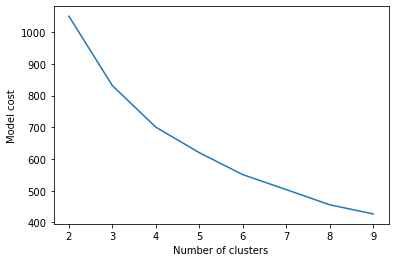

In [14]:
plt.plot(K_range,inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Model cost')

### Three or five clusters are both good picks, but I prefer to take three clusters because five is less relevant. Indeed, the more clusters there are, the less interest there is in segmenting the data.

In [15]:
model = KMeans(n_clusters=3)
model.fit(X)
y_pred = model.predict(X)
y_pred

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 0, 0, 0, 2, 1, 0, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1])

### It's done ! Our data is clustered into three homogeneous groups. Let's visualize them !

# III) Cluster Visualization

In [16]:
X['cluster'] = y_pred

### Even if our clusters are built, we can't visualize them because there are too many features. A Principal Component Analysis (PCA) will help us to reduce the data to two dimensions, which will allow us to visualize our clusters into a scatter plot. 

In [17]:
from sklearn.decomposition import PCA

In [18]:
pca = PCA(n_components=2)
X_final = pca.fit_transform(X)

In [19]:
X_final_pca = pd.DataFrame(X_final,columns=['pca1','pca2'])
X_final_pca.head()

,pca1,pca2
0,-2.812891,0.205835
1,0.290463,-0.702677
2,-0.408510,-0.543375
3,-2.832817,1.792935
4,0.898448,0.034409


In [20]:
X_final_pca['cluster'] = X['cluster']
X_final_pca.head()

,pca1,pca2,cluster
0,-2.812891,0.205835,1
1,0.290463,-0.702677,2
2,-0.408510,-0.543375,2
3,-2.832817,1.792935,1
4,0.898448,0.034409,2


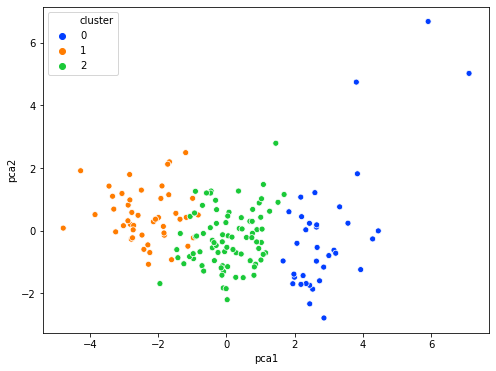

In [21]:
plt.figure(figsize=(8,6))
ax = sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=X_final_pca, palette='bright')

### We can easily distinguish the three clusters. Now we want to see which countries are gathered in which cluster.

In [22]:
from wordcloud import WordCloud, ImageColorGenerator

def get_wc(
    liste,
    background_color='white',
    width=800,
    height=650,
    max_font_size=60,
    mask=None,
    margin=1,
):
    return WordCloud(
        background_color=background_color,
        width=width,
        height=height,
        max_font_size=max_font_size,
        mask=mask,
        margin=margin,
    ).generate(" ".join(liste))

In [23]:
X_final_pca['country'] = df['country'].str.replace(' ', '')

## Cluster zero

(-0.5, 799.5, 649.5, -0.5)

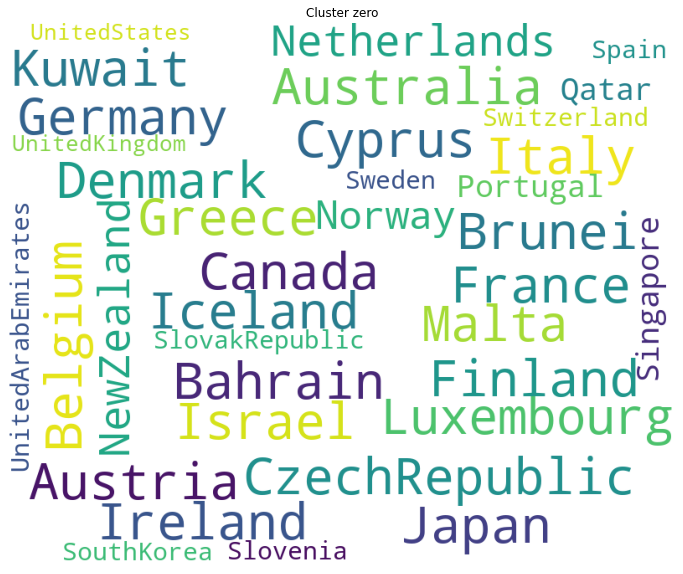

In [24]:
cluster_0= X_final_pca.loc[X_final_pca['cluster']==0]
liste = cluster_0['country'].values.tolist()
wc = get_wc(liste)
plt.figure(figsize=[15, 10])
plt.imshow(wc)
plt.title('Cluster zero')
plt.axis('off')

## Cluster one

(-0.5, 799.5, 649.5, -0.5)

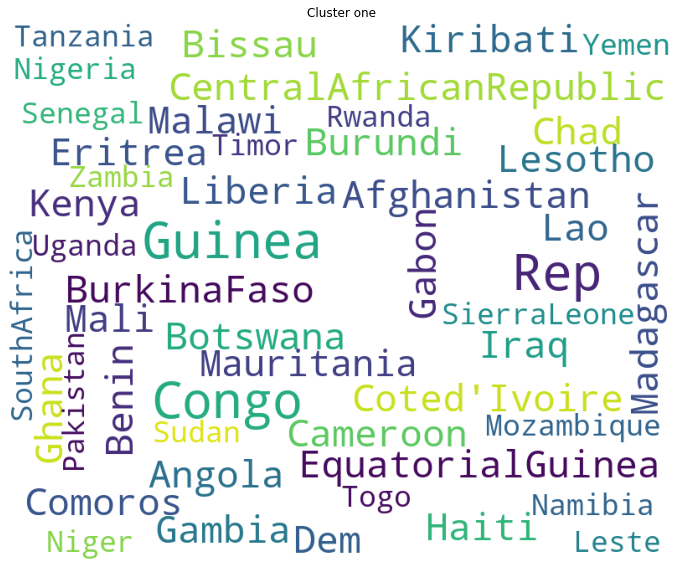

In [25]:
cluster_1= X_final_pca.loc[X_final_pca['cluster']==1]
liste = cluster_1['country'].values.tolist()
wc = get_wc(liste)
plt.figure(figsize=[15, 10])
plt.imshow(wc)
plt.title('Cluster one')
plt.axis('off')

## Cluster two

(-0.5, 799.5, 649.5, -0.5)

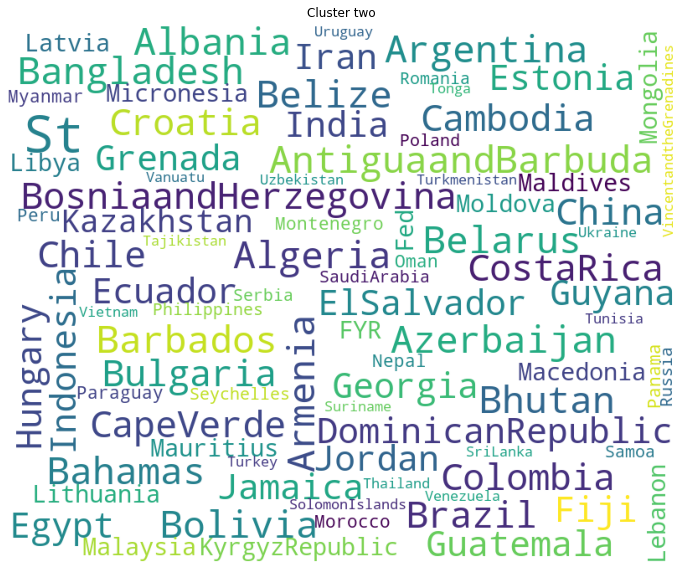

In [26]:
cluster_2= X_final_pca.loc[X_final_pca['cluster']==2]
liste = cluster_2['country'].values.tolist()
wc = get_wc(liste)
plt.figure(figsize=[15, 10])
plt.imshow(wc)
plt.title('Cluster two')
plt.axis('off')

# Conclusions :

### - Cluster zero contains the developed countries
### - Cluster one contains the poor countries
### - Cluster two contains the developing countries

